## Import Package

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split

Mengimpor beberapa package yang akan digunakan untuk menyimpan data dalam tabel, membuat visualisasi data, encoding data, scalling data, pembagian dataset latih dan dataset uji

## Load Dataset

In [2]:
data = pd.read_csv('/content/online_course_engagement_data.csv')

Mengimpor data dari file csv

## Data Exploration

In [3]:
categorical_features = data.select_dtypes(include=['object']).columns
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns

Memisahkan kategorikal dan numerikal fitur

In [4]:
data.head()

,UserID,CourseCategory,TimeSpentOnCourse,NumberOfVideosWatched,NumberOfQuizzesTaken,QuizScores,CompletionRate,DeviceType,CourseCompletion
0,5618,Health,29.979719,17,3,50.365656,20.860773,1,0
1,4326,Arts,27.802640,1,5,62.615970,65.632415,1,0
2,5849,Arts,86.820485,14,2,78.458962,63.812007,1,1
3,4992,Science,35.038427,17,10,59.198853,95.433162,0,1
4,3866,Programming,92.490647,16,0,98.428285,18.102478,0,0


Dari data yang yang telah di load, diketahui data tersebut memiliki 9 kolom yaitu UserID, CourseCategory, TimeSpentOnCourse, NumberOfVideosWatched, NumberOfQuizzesTaken, QuizScores, CompletionRate, DeviceType, CourseCompletion

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   UserID                 9000 non-null   int64  
 1   CourseCategory         9000 non-null   object 
 2   TimeSpentOnCourse      9000 non-null   float64
 3   NumberOfVideosWatched  9000 non-null   int64  
 4   NumberOfQuizzesTaken   9000 non-null   int64  
 5   QuizScores             9000 non-null   float64
 6   CompletionRate         9000 non-null   float64
 7   DeviceType             9000 non-null   int64  
 8   CourseCompletion       9000 non-null   int64  
dtypes: float64(3), int64(5), object(1)
memory usage: 632.9+ KB


Dari informasi diatas didapatkan bahwa data tersebut berjumlah 9000 dengan tidak ada data yang bernilai null

In [6]:
data[numerical_features].describe()

,UserID,TimeSpentOnCourse,NumberOfVideosWatched,NumberOfQuizzesTaken,QuizScores,CompletionRate,DeviceType,CourseCompletion
count,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000
mean,4498.894556,50.163822,10.024667,5.090556,74.706028,50.340146,0.500667,0.396444
std,2596.849433,28.491750,6.029878,3.157762,14.378383,28.950977,0.500027,0.489186
min,1.000000,1.005230,0.000000,0.000000,50.005119,0.009327,0.000000,0.000000
25%,2251.750000,25.440548,5.000000,2.000000,62.283451,25.653614,0.000000,0.000000
50%,4483.500000,49.818417,10.000000,5.000000,74.743294,50.264124,1.000000,0.000000
75%,6751.250000,75.069924,15.000000,8.000000,87.022663,75.572493,1.000000,1.000000
max,9000.000000,99.992558,20.000000,10.000000,99.994984,99.979711,1.000000,1.000000


Dari summary fitur numerik diatas dapat ditarik beberapa informasi
- Rata-rata user menghabiskan waktu di kelas adalah 50 jam
- Rata-rata video yang ditonton oleh user yaitu 10 video
- Rata-rata user mengerjakan kuis sebanyak 5 kali
- Rata-rata skor kuis user adalah 74
- Rata-rata completion rate user adalah 50%

In [7]:
data[categorical_features].astype('object').describe(include='all')

,CourseCategory
count,9000
unique,5
top,Business
freq,1837


Dari summary fitur kategori diatas dapat ditarik beberapa informasi
- Kategori kelas yang paling banyak dibeli adalah kategori bisnis

### Proportion Course Completion

In [8]:
round(data['CourseCompletion'].value_counts(normalize=True) * 100, 2)

,proportion
CourseCompletion,
0,60.36
1,39.64


Dari data diatas terlihat bahwa 60.36% user tidak selesai kelas dan 39.64% menyelesaikan kelas

### Correlation Matrix

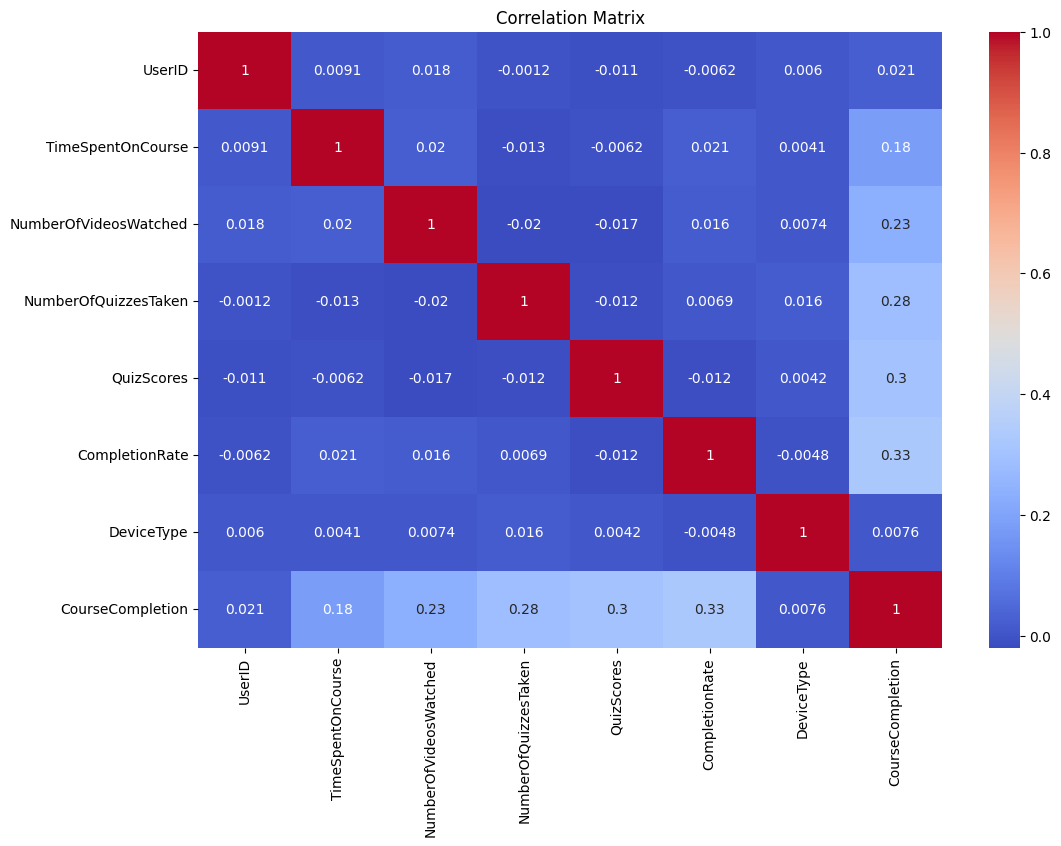

In [11]:
plt.figure(figsize=(12, 8))
corr_matrix = data[numerical_features].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


Dari matriks korelasi diatas diketahui bahwa Top 3 hal yang paling mempengaruhi CourseCompletion adalah CompletionRate, QuizScores, dan NumberOfQuizzesTaken

## Data Preparation

In [12]:
data.drop('UserID', axis=1, inplace=True)

Menghapus kolom UserID karena tidak memiliki karakteristik sehingga tidak akan digunakan dalam permodelan

### Label Encoding

In [13]:
encoder = OneHotEncoder(sparse_output=False)
encoded_features = encoder.fit_transform(data[categorical_features])

encoded_data = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_features))

data = data.join(encoded_data)
data = data.drop(categorical_features, axis=1)
data.head()

,TimeSpentOnCourse,NumberOfVideosWatched,NumberOfQuizzesTaken,QuizScores,CompletionRate,DeviceType,CourseCompletion,CourseCategory_Arts,CourseCategory_Business,CourseCategory_Health,CourseCategory_Programming,CourseCategory_Science
0,29.979719,17,3,50.365656,20.860773,1,0,0.0,0.0,1.0,0.0,0.0
1,27.802640,1,5,62.615970,65.632415,1,0,1.0,0.0,0.0,0.0,0.0
2,86.820485,14,2,78.458962,63.812007,1,1,1.0,0.0,0.0,0.0,0.0
3,35.038427,17,10,59.198853,95.433162,0,1,0.0,0.0,0.0,0.0,1.0
4,92.490647,16,0,98.428285,18.102478,0,0,0.0,0.0,0.0,1.0,0.0


Melakukan encoding kategorikal fitur agar dapat diproses oleh machine learning. Proses encoding dilakukan dengan One Hot Encoder agar algoritma machine learning memahami kategori tanpa menganggap adanya urutan atau hubungan numerik antara kategori tersebut.

### Data Split

In [14]:
X = data.drop(["CourseCompletion"],axis =1)
y = data["CourseCompletion"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

Membagi data menjadi data latih dan data uji dengan perbandingan 80% data latih dan 20% data uji

### Standarisasi

In [15]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train[X_train.columns] = scaler.transform(X_train)

Karena nilai setiap fitur memiliki skala yang berbeda maka dibutuhkan sehingga dibutuhkan proses scalling sehingga memiliki skala yang sama data distribusi nilai yang seragam. Dengan data yang diskalakan juga dapat meningkatkan performa pelatihan model machine learning dapat lebih cepat menemukan solusi optimal dan menghindari bias terhadap fitur dengan skala yang lebih besar. StandardScaler mengubah fitur-fitur dalam dataset sehingga memiliki distribusi dengan mean 0 dan standard deviation 1

In [16]:
X_train.head()

,TimeSpentOnCourse,NumberOfVideosWatched,NumberOfQuizzesTaken,QuizScores,CompletionRate,DeviceType,CourseCategory_Arts,CourseCategory_Business,CourseCategory_Health,CourseCategory_Programming,CourseCategory_Science
6244,1.391153,-0.839141,-1.619182,-1.110251,-1.334052,1.001946,-0.484759,-0.508234,-0.505636,-0.498915,1.990501
2289,-0.805303,-0.673471,0.914983,-0.823937,0.558859,1.001946,2.062880,-0.508234,-0.505636,-0.498915,-0.502386
6462,-0.273353,-1.667490,0.281442,-0.546515,-0.149966,1.001946,-0.484759,-0.508234,-0.505636,-0.498915,1.990501
1721,-0.964590,0.817558,0.914983,1.212902,-0.708019,-0.998057,2.062880,-0.508234,-0.505636,-0.498915,-0.502386
1762,1.176069,-0.010792,-0.352099,-0.682534,1.589860,-0.998057,-0.484759,-0.508234,-0.505636,2.004351,-0.502386


Berikut preview data latih yang telah dilakukan scalling. terlihat bahwa setiap fitur memiliki rentang skala yang seragam

In [17]:
X_test[X_test.columns] = scaler.transform(X_test)

Scalling data juga dilakukan di data uji untuk input pengujian model.

In [18]:
X_test.head()

,TimeSpentOnCourse,NumberOfVideosWatched,NumberOfQuizzesTaken,QuizScores,CompletionRate,DeviceType,CourseCategory_Arts,CourseCategory_Business,CourseCategory_Health,CourseCategory_Programming,CourseCategory_Science
3733,-1.601400,-0.839141,1.548524,0.549356,0.775174,1.001946,-0.484759,-0.508234,-0.505636,2.004351,-0.502386
4478,-0.738053,-0.507801,1.548524,-0.397101,0.820942,1.001946,-0.484759,-0.508234,-0.505636,-0.498915,1.990501
8420,-0.440955,0.651888,0.598212,1.282600,0.372397,1.001946,2.062880,-0.508234,-0.505636,-0.498915,-0.502386
6685,0.025613,0.983228,1.231754,-1.363361,0.183275,1.001946,-0.484759,-0.508234,1.977707,-0.498915,-0.502386
4975,-0.805782,0.154878,-1.302411,-0.209532,0.610641,-0.998057,-0.484759,1.967600,-0.505636,-0.498915,-0.502386


Terlihat bahwa setiap fitur dari data uji sudah memiliki skala yang seragam

## Model Development

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

Kode diatas digunakan untuk mengimpor package yang diperlukan dalam proses pelatihan model yaitu beberapa jenis model klasifikasi dan metrik evaluasi yaitu skor akurasi

In [20]:
models = pd.DataFrame(index=['train_accuracy', 'test_accuracy'],
                      columns=['KNN', 'DecisionTree', 'RandomForest', 'Boosting'])

Kode diatas digunakan untuk menyiapkan tabel yang akan digunakan untuk melihat perbandingan akurasi dari model yang akan dilatih

In [21]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

models.loc['train_accuracy','KNN'] = accuracy_score(y_pred = knn.predict(X_train), y_true=y_train)
models.loc['test_accuracy','KNN'] = accuracy_score(y_pred = knn.predict(X_test), y_true=y_test)

Dilakukan proses pelatihan dengan algoritma KNN dengan nilai n = 3. Model yang telah dilatih kemudian dievaluasi menggunakan data latih dan dihitung skor akurasinya. Setelah itu dimasukkan kedalam tabel yang telah disiapkan.

In [22]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
models.loc['train_accuracy','DecisionTree'] = accuracy_score(y_pred = dt.predict(X_train), y_true=y_train)
models.loc['test_accuracy','DecisionTree'] = accuracy_score(y_pred = dt.predict(X_test), y_true=y_test)

Dilakukan proses pelatihan dengan algoritma Decision Tree. Model yang telah dilatih kemudian dievaluasi menggunakan data latih dan dihitung skor akurasinya. Setelah itu dimasukkan kedalam tabel yang telah disiapkan.

In [23]:
rf = RandomForestClassifier(n_estimators = 100)
rf.fit(X_train, y_train)
models.loc['train_accuracy','RandomForest'] = accuracy_score(y_pred = rf.predict(X_train), y_true=y_train)
models.loc['test_accuracy','RandomForest'] = accuracy_score(y_pred = rf.predict(X_test), y_true=y_test)

Dilakukan proses pelatihan dengan algoritma Random Forest dengan nilai n estimator 100. Model yang telah dilatih kemudian dievaluasi menggunakan data latih dan dihitung skor akurasinya. Setelah itu dimasukkan kedalam tabel yang telah disiapkan.

In [24]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
models.loc['train_accuracy','Boosting'] = accuracy_score(y_pred = gb.predict(X_train), y_true=y_train)
models.loc['test_accuracy','Boosting'] = accuracy_score(y_pred = gb.predict(X_test), y_true=y_test)

Dilakukan proses pelatihan dengan algoritma Gradient Boosting. Model yang telah dilatih kemudian dievaluasi menggunakan data latih dan dihitung skor akurasinya. Setelah itu dimasukkan kedalam tabel yang telah disiapkan.

In [25]:
models

,KNN,DecisionTree,RandomForest,Boosting
train_accuracy,0.924861,1.0,1.0,0.962361
test_accuracy,0.840556,0.913889,0.959444,0.954444


Dari tabel skor akurasi beberapa model yang telah dilatih didapatkan bahwa Algoritma Gradient Boosting memiliki performa yang paling baik karena mengahasilkan akurasi fit tertinggi antara akurasi data latih dan data uji.

In [26]:
importances = gb.feature_importances_

feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

importance_df

,Feature,Importance
3,QuizScores,2.550359e-01
2,NumberOfQuizzesTaken,2.363850e-01
4,CompletionRate,2.173580e-01
1,NumberOfVideosWatched,1.594631e-01
0,TimeSpentOnCourse,1.316727e-01
9,CourseCategory_Programming,5.058758e-05
10,CourseCategory_Science,3.471173e-05
8,CourseCategory_Health,7.120936e-17
5,DeviceType,0.000000e+00
6,CourseCategory_Arts,0.000000e+00


Dari model terbaik dilakukan perangkingan fitur yang paling penting dalam menentukan CourseCompletion yaitu top 3 fitur nya adalah QuizScores, NumberOfQuizzesTaken, dan CompletionRate